# Continous Probability Distributions
------

1. [StatTreak Overview](http://stattrek.com/probability-distributions/probability-distribution.aspx)
2. [Common Probability Distributions: The Data Scientist’s Crib Sheet](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)
3. [Scipy Distributions](https://docs.scipy.org/doc/scipy/reference/stats.html)
  -  [scipy distribution functions](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)
4. [R E-Tutorial Introduction to Stats](http://www.r-tutor.com/elementary-statistics/probability-distributions)
5. Truncated distributions.
  -  [How to sample truncated distributions](https://www.google.co.uk/search?client=firefox-b-ab&dcr=0&ei=1ShNWuXYIM3IwALT_orgCQ&q=truncated+distribution+python+tutorial&oq=truncated+distribution+python+tut&gs_l=psy-ab.3.0.33i21k1j33i160k1.14122.16124.0.17521.11.11.0.0.0.0.164.1137.6j5.11.0....0...1c.1.64.psy-ab..0.11.1129...0j0i22i30k1.0.chuX-eNenpo)
  
6. detailed distributions [map](http://www.math.wm.edu/~leemis/chart/UDR/UDR.html)
  
  
In this notebook we will demonstrate common probability distributions and there implementations in SciPy.

In [106]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Normal $(aka.Guassian)$ Distribution

##### Consider:
Assume that the test scores of a college entrance exam fits a normal distribution. Furthermore, the mean test score is 72, and the standard deviation is 15.2. What is the percentage of students scoring 84 or more in the exam? 

84 or more = 0.215 %


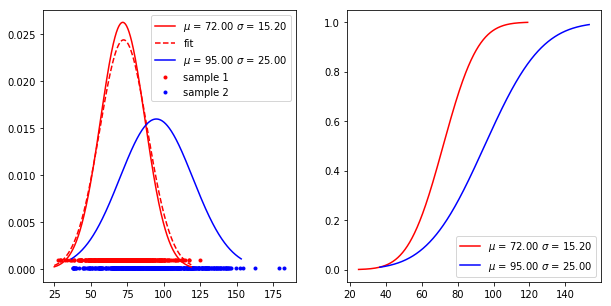

In [107]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(10,5))
from scipy.stats import norm

mu = 72
si = 15.2
num = 500
x_guess = 84
sample = norm.rvs(loc=mu, scale=si, size=num)

x = np.linspace(norm.ppf(0.001, loc=mu, scale=si),
                norm.ppf(0.999, loc=mu, scale=si), num)

pdf = norm.pdf(x, loc=mu, scale=si)
cdf = norm.cdf(x, loc=mu, scale=si)

print('%s or more = %.3f %%' %(x_guess,
                               1.0 - norm.cdf(x_guess, loc=mu, scale=si)))

ax1.plot(x, pdf, color='red',
         label=r'$\mu$ = %.2f $\sigma$ = %.2f' %(mu,si))
ax2.plot(x, cdf, color='red',
         label=r'$\mu$ = %.2f $\sigma$ = %.2f' %(mu,si))

ax1.scatter(sample, [0.001]*num, marker='.', color='red', label='sample 1')

mu_f, si_f = norm.fit(sample)
pdf_f = norm.pdf(x, loc=mu_f, scale=si_f)
ax1.plot(x, pdf_f, 'r--', label='fit')

mu = 95
si = 25
sample = norm.rvs(loc=mu, scale=si, size=num)
x = np.linspace(norm.ppf(0.01, loc=mu, scale=si),
                norm.ppf(0.99, loc=mu, scale=si), num)

pdf = norm.pdf(x, loc=mu, scale=si)
cdf = norm.cdf(x, loc=mu, scale=si)

ax1.plot(x, pdf, color='blue',
         label=r'$\mu$ = %.2f $\sigma$ = %.2f' %(mu,si))
ax2.plot(x, cdf, color='blue',
         label=r'$\mu$ = %.2f $\sigma$ = %.2f' %(mu,si))

ax1.scatter(sample, [0.0001]*num, marker='.', color='blue',label='sample 2')

ax1.legend();
ax2.legend();

# Log-Normal $(Galton)$ Distribution 
[Wiki](https://en.wikipedia.org/wiki/Log-normal_distribution)<BR>
[Exaplain](http://www.statisticshowto.com/lognormal-distribution/)<BR>
[nist](http://www.itl.nist.gov/div898/handbook/eda/section3/eda3669.htm)

An outcome that follows a log-normal distribution takes on values whose logarithm is normally distributed. Or: the exponentiation of a normally-distributed value is log-normally distributed. If sums of things are normally distributed, then remember that products of things are log-normally distributed.

or

A log-normal (or lognormal) distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed. Thus:
 - If the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution. 
 - Likewise, if Y has a normal distribution, then the exponential function of Y, X = exp(Y), has a log-normal distribution.
 
#### Parameters
1. $shape$ = the shape parameter. Also the standard deviation for the lognormal, this affects the general shape of the distribution. Usually, these parameters are known from historical data. Sometimes, you might be able to estimate it with current data. The shape parameter doesn’t change the location or height of the graph; it just affects the overall shape. <BR><BR>
2. $loc$ =  the location parameter, which tells you where on the x-axis the graph is located.<BR><BR>
3. $scale$ = the scale parameter (this is also the median). This parameter shrinks or stretches the graph.

You can convert between log:exp distributions, e.g. the log of
our log-norm distributed values:

shape= 1.03 loc= -1.59 scale= 148.32 (median=137.28)

back to the normally distributed values:
mean= 4.98 and std-dev= 1.05


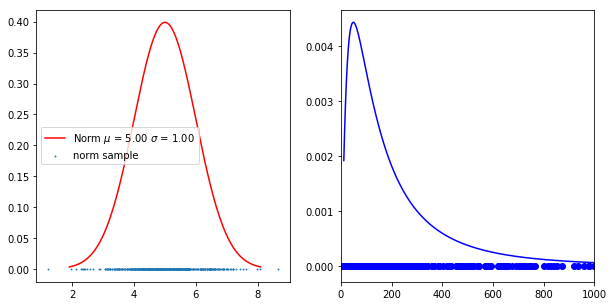

In [108]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(10,5))
from scipy.stats import norm

mu = 5
si = 1
num = 500
sample = norm.rvs(loc=mu, scale=si, size=num)

x = np.linspace(norm.ppf(0.001, loc=mu, scale=si),
                norm.ppf(0.999, loc=mu, scale=si), num)
pdf = norm.pdf(x, loc=mu, scale=si)

ax1.plot(x, pdf, color='red',
         label=r'Norm $\mu$ = %.2f $\sigma$ = %.2f' %(mu,si));
ax1.scatter(sample, [0]*num, label='norm sample', s=0.75);
ax1.legend();

from scipy.stats import lognorm
log_sample = np.exp(sample)

shape, mu_ln, si_ln = lognorm.fit(log_sample)

# si is similar to np.median(log_sample)

x = np.linspace(lognorm.ppf(0.01, s=shape, loc=mu_ln, scale=si_ln),
                lognorm.ppf(0.99, s=shape, loc=mu_ln, scale=si_ln), num)

pdf = lognorm.pdf(x, s=shape, loc=mu_ln, scale=si_ln)

ax2.plot(x, pdf, color='blue', label='fit lognorm')
ax2.scatter(log_sample, [0]*num, color='blue', label='log sample')

print("""You can convert between log:exp distributions, e.g. the log of
our log-norm distributed values:
\nshape= %.2f loc= %.2f scale= %.2f (median=%.2f)\n
back to the normally distributed values:
mean= %.2f and std-dev= %.2f""" 
      %(shape, mu_ln, si_ln, np.median(log_sample),
      np.log(log_sample).mean(), np.log(log_sample).std()))


ax2.set_xlim(0.01,1000);

# Students t-distribution

According to the central limit theorem, the sampling distribution of a statistic (like a sample mean) will follow a normal distribution, as long as the sample size is sufficiently large. Therefore, when we know the standard deviation of the population, we can compute a z-score, and use the normal distribution to evaluate probabilities with the sample mean.

But sample sizes are sometimes small, and often we do not know the standard deviation of the population. When either of these problems occur, statisticians rely on the distribution of the t statistic (also known as the t score), whose values are given by:

$t-score$ = [ x - μ ] / [ s / sqrt( n ) ]

where:
 - $x$ is the sample mean
 - $μ$ is the population mean, 
 - $s$ is the standard deviation of the sample, and 
 - $n$ is the sample size. 

The distribution of the t statistic is called the t distribution or the Student t distribution.

The t distribution allows us to conduct statistical analyses on certain data sets that are not appropriate for analysis, using the normal distribution.

The particular form of the t distribution is determined by its degrees of freedom. The degrees of freedom refers to the number of independent observations in a set of data.When estimating a mean score or a proportion from a single sample, the number of independent observations is equal to the sample size minus one. A t distribution having 15 degrees of freedom would be used with a sample of size 16.

The t distribution arises in hypothesis tests concerning the comparison of: (a) a sample mean to a standard, or (b) the difference between two mean


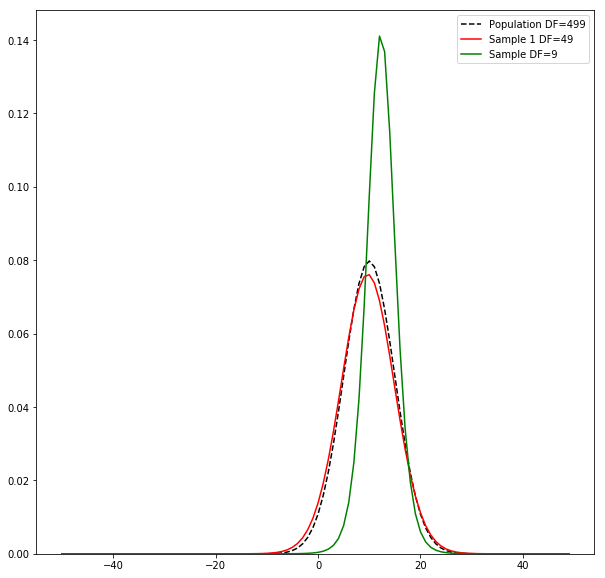

In [109]:
fig, (ax1) = plt.subplots(1,1, sharey=False, figsize=(10,10))
from scipy.stats import t
xs = np.arange(-50,50,1)

mean, std, pop = 10, 5, 500
population = norm.rvs(loc=mean, scale=std, size=pop)
U = population.mean()
ax1.plot(xs, norm.pdf(xs, loc=mean, scale=std),
         label='Population DF=%d' %(pop-1), 
         linestyle='--', color='black');

n = 50
sample = norm.rvs(loc=10, scale=5, size=n)
u = sample.mean()
s = sample.std()
df = len(sample)-1
pdf = t.pdf(xs, df, loc=u, scale=s)
cdf = t.cdf(xs, df, loc=u, scale=s)
ax1.plot(xs, pdf,'r-', label='Sample 1 DF=%d' %df);


n = 10
sample = norm.rvs(loc=10, scale=5, size=n)
u = sample.mean()
s = sample.std()
df = len(sample)-1
pdf = t.pdf(xs, df, loc=u, scale=s)
cdf = t.cdf(xs, df, loc=u, scale=s)
ax1.plot(xs, pdf,'r-', label='Sample DF=%d' %df, color='green');

ax1.set_ylim(0,)
ax1.legend();

### [When to use the T-distribution?](http://www.statisticshowto.com/probability-and-statistics/t-distribution/)

The t distribution is used instead of the normal distribution when you have small samples. The larger the sample size, the more the t distribution looks like the normal distribution. In fact, for sample sizes larger than 20 (e.g. more degrees of freedom), the distribution is almost exactly like the normal distribution. 


In general, this distribution is used when you have a small sample size (under 30) or you don’t know the population standard deviation. For practical purposes (i.e. in the real world), this is nearly always the case. So, unlike in your elementary statistics class, you’ll likely be using it in real life situations more than the normal distribution. If the size of your sample is large enough, the two distributions are practically the same.

#### Consider [this](https://simon.cs.vt.edu/SoSci/converted/T-Dist/activity.html):

A researcher administers a survey where students answer questions on a scale of 1 to 7 with 1 representing very unsatisfied with dormitory living and 7 representing very satisfied with dormitory living. The researcher wants to know if students have feelings about dormitory living that are not neutral. 

The researcher collects a sample because its not  feasible to survey all members of a population. <BR>

The researcher will then compute the mean level of satisfaction in the sample. Chances are that the sample mean will not be exactly 4 (i.e., neutral). <BR>

Therefore, the researcher has to determine if the sample mean deviates from 4 due to sampling error, or if the sample mean deviates from 4 because the population of dormitory students are not neutral about dorm life. Let's assume that the researcher samples 15 students, that the sample mean is 5.0, and that the sample standard deviation is 1.936.

The question the researcher must answer is whether, given sampling error, 5.0 is far enough away from 4 to conclude that college students at State University are not neutral about dorm living?

Therefore, the researcher must somehow estimate the sampling distribution and standard error without surveying all members of the population. Fortunately, statistical research shows that when certain assumptions are met, the sampling distribution can be estimated. The shape of the sampling distribution for this type of problem is different from the normal distribution, especially when sample size is less than 30 subjects. This sampling distribution is given the special label of the "t-distribution". For practical purposes, the shape of the t-distribution is identical to the normal distribution when sample size is large. However, when sample sizes are small (below 30 subjects), the shape of the t-distribution is flatter than that of the normal distribution, and the t-distribution has greater area under the tails. 

In [110]:
def fill_tail(p, ax, color, alpha):
    xleft = np.linspace(t.ppf(0.001, df=df, loc=mean, scale=sd),
            t.ppf(p, df=df, loc=mean, scale=sd))
    xright = np.linspace(t.ppf(1-p, df=df, loc=mean, scale=sd),
                t.ppf(0.999, df=df, loc=mean, scale=sd))

    l = t.pdf(xleft, df, loc=mean, scale=sd)
    r= t.pdf(xright, df, loc=mean, scale=sd)
    ax.fill_between(xleft, l, color=color, alpha=alpha)
    ax.fill_between(xright, r, color=color, alpha=alpha)

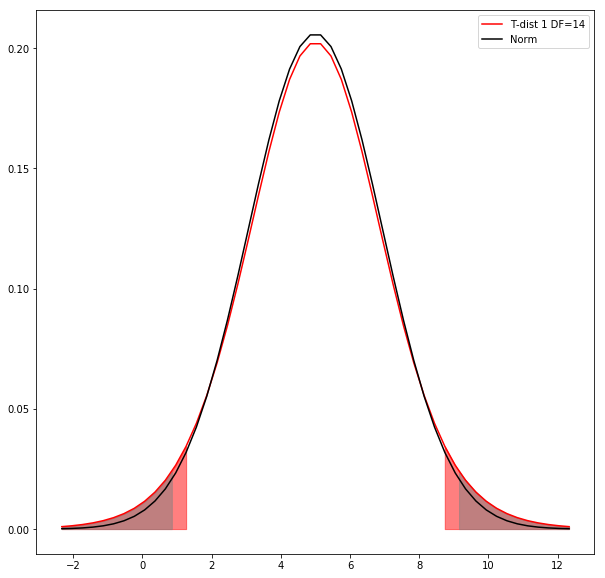

In [111]:
fig, (ax1) = plt.subplots(1,1, sharey=False, figsize=(10,10))
from scipy.stats import t

n = 15
mean = 5
sd = 1.936
sample = norm.rvs(loc=mean, scale=sd, size=n)
df = len(sample)-1
xs = np.linspace(t.ppf(0.001, df=df, loc=mean, scale=sd),
               t.ppf(0.999, df=df, loc=mean, scale=sd))

pdf = t.pdf(xs, df, loc=mean, scale=sd)
cdf = t.cdf(xs, df, loc=mean, scale=sd)

ax1.plot(xs, pdf,'r-', label='T-dist 1 DF=%d' %df);
ax1.plot(xs, norm.pdf(xs, mean,sd),'k-',label='Norm');

fill_tail(0.037, ax1, 'red', 0.5)
fill_tail(0.025, ax1, 'grey', 0.5)

ax1.legend();

the researcher also needs to estimate the standard error. The standard error is the standard deviation of the sample mean.

It is important to understand that standard error is not the standard deviation for the values of the population, nor is it the standard deviation for the values of the sample. 

Rather, standard error is a measure of the error that we expect to find in the value obtained for the sample mean. For a given size N, there are many different samples of that size that can be drawn from the population. Each such sample of size N has a mean. It is the distribution of these sample means, and thus a measure of the error for any one of those means, that is being described by the term "standard error." Of course, we only have one sample, and so one sample mean.

The standard error for this mean can be estimated using the standard deviation for the values of the sample. Recall that we assumed that our survey yielded a sample mean of 5.0 with a sample standard deviation of 1.936. To answer our dormitory question, we estimate the standard error of the sample mean using the following formula. 

$$SE = \frac{sd}{\sqrt{N}}$$

 Again, this standard error of the sample mean is interpreted as the standard deviation of the t-distribution when the sample size is 15. 

In [70]:
SE = sd / np.sqrt(n)
print('Standard Error = %.4f' %SE)

Standard Error = 0.4999


 Once we recognize the shape of the t-distribution and we know the value of the standard error it is a simple matter to make a statistical decision about our survey result. The null hypothesis for this study is that students have neutral feeling about dorm life at State University. The nondirectional alternative hypothesis is that students at State university are not neutral. Recall that scientists traditionally use a 5% probability of a Type I error - that is, they want to make sure that the probability of incorrectly rejecting the null hypothesis is less than 5%. Using this 5% standard, all that is necessary is to calculate how many standard errors the sample mean is from the hypothetical population mean of 4.

The two-tailed, .05 critical t-values are +2.15 when the sample size is 15. So, the null hypothesis will be rejected in favor of the hypothesis that students are not neutral about dorm life if the observed sample mean is greater or less than 2.15 standard errors of the mean away from the hypothetical population mean of 4. Since the observed sample mean for our example is 5.0, and .50 is the standard error of the mean, then we see that the sample mean is 2.0 standard errors of the mean away from 4. It is 2.0 standard errors away because 5.0 (the sample mean) minus 4 (the population mean) equals 1.0, and 1.0 divided by .50 (the standard error of the mean) equals 2.0. Given that 2.0 is less than the critical value value of 2.15, the researcher fails to reject the null hypothesis. Based on the evidence from the sample of 15 subjects, the researcher cannot conclude that students are satisfied with dorm living. Remember that failing to reject the null hypothesis does not necessarily mean the null hypothesis is true, since the standard for rejecting the null hypothesis is pretty high. Therefore, the researcher doesn't conclude that students' attitudes are neutral about dorm living. Instead, the researcher concludes that there is not enough evidence to conclude that students are dissatisfied or satisfied with dorm living. 

### Scipy T-test
[Example](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f)<BR>
[StackOverflow](https://stackoverflow.com/questions/22611446/perform-2-sample-t-test)<BR>
[To Welch? or not to Welch?](http://daniellakens.blogspot.co.uk/2015/01/always-use-welchs-t-test-instead-of.html)

Lets use scipys own $t-test$ implementation to determined:

 - $H0$: null hypothesis is that averages are the same (our sample is the same as the population).
 - $H1$: hypothesis that our sample mean is different than the population.
 
The test returns the:
 - $t-statistic$
 - $p-value$
 
$\alpha$ is the critical value (i.e. 0.01, 0.05, 0.10). If the test $p-value$ is smaller than $\alpha$, then we reject $H0$ (accept $H1$ that the means are different).

Reject H0
Accept H1
p-value = 0.00000 (<= 0.05)


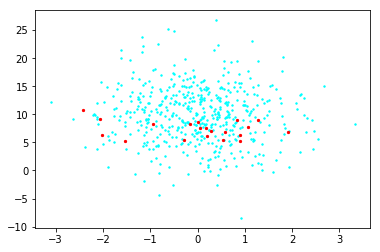

In [145]:
alpha = 0.05

mean, std, pop = 10, 5, 500
population = norm.rvs(loc=mean, scale=std, size=pop)

mean, std, sam = 8, 2, 20
sample = norm.rvs(loc=mean, scale=std, size=sam)

plt.scatter(np.random.randn(pop),population, s=2, c='cyan')
plt.scatter(np.random.randn(sam),sample, s=5, c='red')

t,p = stats.ttest_ind(population, sample, equal_var=False)

if p <= alpha:
    print('Reject H0\nAccept H1\np-value = %.5f (<= %s)' %(p,alpha))
else:
    print('Reject H1\nAccept H0\np-value = %.5f (> %s)' %(p,alpha))

# Chi-Squared Distribution
